## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.509945  0.895471  0.514895  1.478223 -0.678759  1.149460
1 -0.481325 -0.501168 -1.706469  1.670211 -0.927320  0.816243
2  1.377742  1.247364 -1.333221 -0.052293 -1.612513 -0.312384
3 -0.604900  0.645016 -0.620896  1.504347  0.550860  1.099567
4  1.343534 -1.298190  1.183107 -0.911428  0.986447 -0.286157


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0034796	total: 57.4ms	remaining: 57.4s
1:	learn: 0.9955634	total: 58.2ms	remaining: 29s
2:	learn: 0.9854152	total: 58.9ms	remaining: 19.6s
3:	learn: 0.9751097	total: 59.5ms	remaining: 14.8s
4:	learn: 0.9674357	total: 60ms	remaining: 11.9s
5:	learn: 0.9584692	total: 60.5ms	remaining: 10s
6:	learn: 0.9474819	total: 61.2ms	remaining: 8.68s
7:	learn: 0.9363748	total: 61.8ms	remaining: 7.66s
8:	learn: 0.9282240	total: 62.3ms	remaining: 6.86s
9:	learn: 0.9187161	total: 62.8ms	remaining: 6.22s
10:	learn: 0.9097925	total: 63.3ms	remaining: 5.69s
11:	learn: 0.9001225	total: 63.8ms	remaining: 5.25s
12:	learn: 0.8902356	total: 64.2ms	remaining: 4.88s
13:	learn: 0.8818494	total: 64.8ms	remaining: 4.56s
14:	learn: 0.8752731	total: 65.2ms	remaining: 4.28s
15:	learn: 0.8682358	total: 65.6ms	remaining: 4.04s
16:	learn: 0.8611355	total: 66.1ms	remaining: 3.82s
17:	learn: 0.8516464	total: 66.7ms	remaining: 3.64s
18:	learn: 0.8446194	total: 67.1ms	remaining: 3.46

98:	learn: 0.4304059	total: 106ms	remaining: 967ms
99:	learn: 0.4266444	total: 107ms	remaining: 961ms
100:	learn: 0.4237255	total: 107ms	remaining: 955ms
101:	learn: 0.4202094	total: 108ms	remaining: 949ms
102:	learn: 0.4173262	total: 108ms	remaining: 941ms
103:	learn: 0.4139759	total: 109ms	remaining: 935ms
104:	learn: 0.4105976	total: 109ms	remaining: 930ms
105:	learn: 0.4075075	total: 110ms	remaining: 925ms
106:	learn: 0.4042266	total: 110ms	remaining: 919ms
107:	learn: 0.4015268	total: 111ms	remaining: 913ms
108:	learn: 0.3985963	total: 111ms	remaining: 907ms
109:	learn: 0.3957885	total: 112ms	remaining: 902ms
110:	learn: 0.3928077	total: 112ms	remaining: 896ms
111:	learn: 0.3898995	total: 112ms	remaining: 889ms
112:	learn: 0.3868461	total: 113ms	remaining: 884ms
113:	learn: 0.3843092	total: 113ms	remaining: 878ms
114:	learn: 0.3812953	total: 113ms	remaining: 872ms
115:	learn: 0.3781249	total: 114ms	remaining: 868ms
116:	learn: 0.3757145	total: 114ms	remaining: 864ms
117:	learn: 0.

259:	learn: 0.1478521	total: 186ms	remaining: 529ms
260:	learn: 0.1474679	total: 187ms	remaining: 528ms
261:	learn: 0.1468023	total: 187ms	remaining: 527ms
262:	learn: 0.1461656	total: 187ms	remaining: 525ms
263:	learn: 0.1454111	total: 188ms	remaining: 524ms
264:	learn: 0.1446317	total: 188ms	remaining: 522ms
265:	learn: 0.1435637	total: 189ms	remaining: 521ms
266:	learn: 0.1424213	total: 189ms	remaining: 519ms
267:	learn: 0.1417170	total: 190ms	remaining: 518ms
268:	learn: 0.1410891	total: 190ms	remaining: 517ms
269:	learn: 0.1400119	total: 191ms	remaining: 515ms
270:	learn: 0.1391058	total: 191ms	remaining: 514ms
271:	learn: 0.1381467	total: 192ms	remaining: 513ms
272:	learn: 0.1371441	total: 192ms	remaining: 512ms
273:	learn: 0.1365232	total: 192ms	remaining: 510ms
274:	learn: 0.1356953	total: 193ms	remaining: 508ms
275:	learn: 0.1346615	total: 193ms	remaining: 507ms
276:	learn: 0.1340268	total: 195ms	remaining: 508ms
277:	learn: 0.1333433	total: 195ms	remaining: 506ms
278:	learn: 

472:	learn: 0.0479951	total: 289ms	remaining: 322ms
473:	learn: 0.0476414	total: 290ms	remaining: 321ms
474:	learn: 0.0473257	total: 290ms	remaining: 321ms
475:	learn: 0.0469697	total: 290ms	remaining: 320ms
476:	learn: 0.0467214	total: 291ms	remaining: 319ms
477:	learn: 0.0465448	total: 291ms	remaining: 318ms
478:	learn: 0.0462222	total: 292ms	remaining: 317ms
479:	learn: 0.0458882	total: 292ms	remaining: 317ms
480:	learn: 0.0455354	total: 293ms	remaining: 316ms
481:	learn: 0.0452133	total: 293ms	remaining: 315ms
482:	learn: 0.0449176	total: 294ms	remaining: 314ms
483:	learn: 0.0446843	total: 294ms	remaining: 314ms
484:	learn: 0.0444793	total: 294ms	remaining: 313ms
485:	learn: 0.0442223	total: 295ms	remaining: 312ms
486:	learn: 0.0439718	total: 295ms	remaining: 311ms
487:	learn: 0.0436906	total: 296ms	remaining: 310ms
488:	learn: 0.0434705	total: 296ms	remaining: 309ms
489:	learn: 0.0432291	total: 297ms	remaining: 309ms
490:	learn: 0.0430759	total: 297ms	remaining: 308ms
491:	learn: 

646:	learn: 0.0210532	total: 369ms	remaining: 201ms
647:	learn: 0.0210279	total: 370ms	remaining: 201ms
648:	learn: 0.0209410	total: 370ms	remaining: 200ms
649:	learn: 0.0208190	total: 371ms	remaining: 200ms
650:	learn: 0.0207236	total: 371ms	remaining: 199ms
651:	learn: 0.0206228	total: 372ms	remaining: 198ms
652:	learn: 0.0204849	total: 373ms	remaining: 198ms
653:	learn: 0.0203456	total: 373ms	remaining: 198ms
654:	learn: 0.0203208	total: 374ms	remaining: 197ms
655:	learn: 0.0202964	total: 374ms	remaining: 196ms
656:	learn: 0.0201640	total: 375ms	remaining: 196ms
657:	learn: 0.0200833	total: 375ms	remaining: 195ms
658:	learn: 0.0199786	total: 376ms	remaining: 194ms
659:	learn: 0.0198770	total: 376ms	remaining: 194ms
660:	learn: 0.0197984	total: 377ms	remaining: 193ms
661:	learn: 0.0196998	total: 377ms	remaining: 193ms
662:	learn: 0.0196232	total: 378ms	remaining: 192ms
663:	learn: 0.0195216	total: 378ms	remaining: 191ms
664:	learn: 0.0194261	total: 379ms	remaining: 191ms
665:	learn: 

839:	learn: 0.0105533	total: 473ms	remaining: 90.1ms
840:	learn: 0.0105226	total: 473ms	remaining: 89.5ms
841:	learn: 0.0104968	total: 474ms	remaining: 88.9ms
842:	learn: 0.0104795	total: 474ms	remaining: 88.3ms
843:	learn: 0.0104543	total: 475ms	remaining: 87.7ms
844:	learn: 0.0104034	total: 475ms	remaining: 87.2ms
845:	learn: 0.0103480	total: 476ms	remaining: 86.6ms
846:	learn: 0.0102934	total: 476ms	remaining: 86ms
847:	learn: 0.0102613	total: 476ms	remaining: 85.4ms
848:	learn: 0.0102080	total: 477ms	remaining: 84.8ms
849:	learn: 0.0101714	total: 477ms	remaining: 84.2ms
850:	learn: 0.0101229	total: 478ms	remaining: 83.6ms
851:	learn: 0.0100793	total: 478ms	remaining: 83.1ms
852:	learn: 0.0100262	total: 479ms	remaining: 82.5ms
853:	learn: 0.0099940	total: 479ms	remaining: 82ms
854:	learn: 0.0099668	total: 480ms	remaining: 81.4ms
855:	learn: 0.0099355	total: 481ms	remaining: 80.8ms
856:	learn: 0.0098840	total: 481ms	remaining: 80.3ms
857:	learn: 0.0098578	total: 482ms	remaining: 79.7

997:	learn: 0.0066731	total: 553ms	remaining: 1.11ms
998:	learn: 0.0066428	total: 553ms	remaining: 553us
999:	learn: 0.0066319	total: 554ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

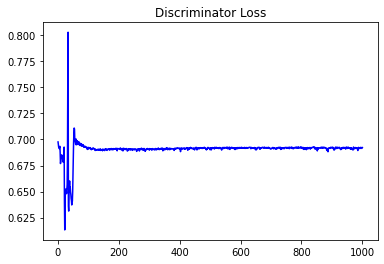

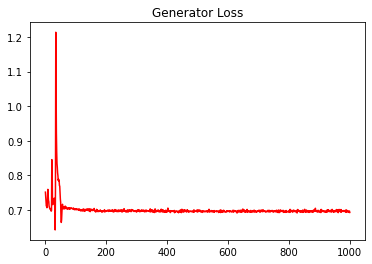

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.14768741355425566


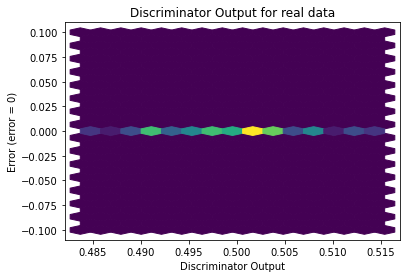

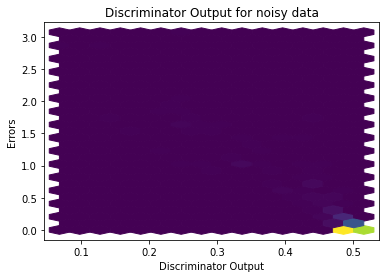

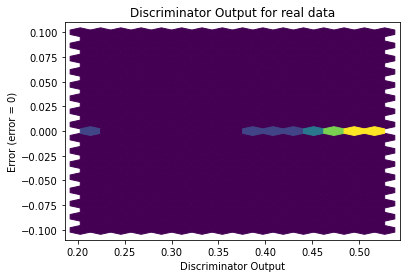

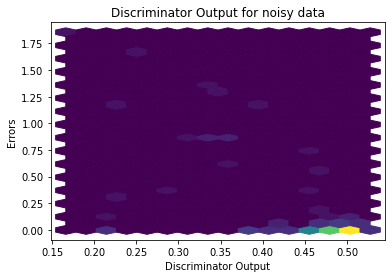

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


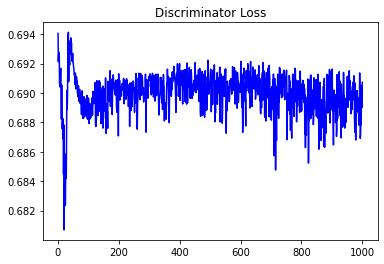

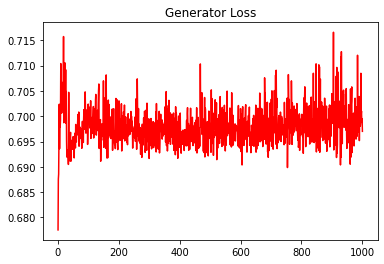

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.05855933781549131


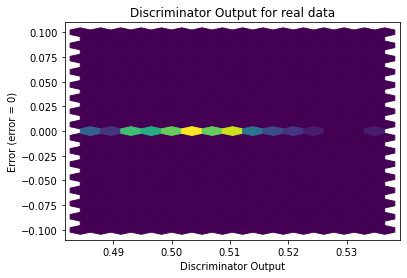

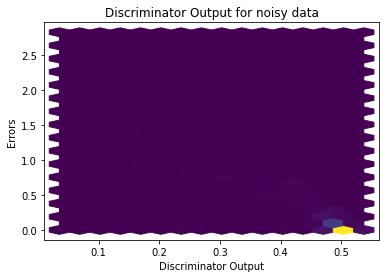

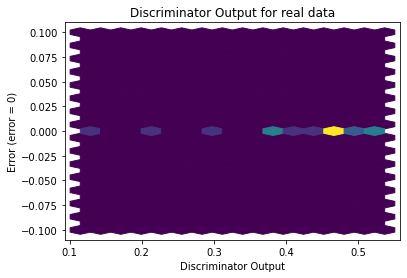

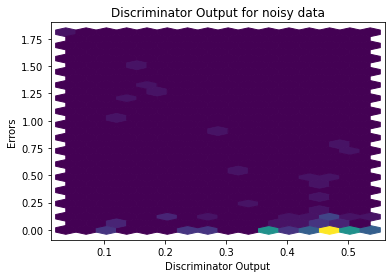

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2891]], requires_grad=True)
